# Aula02

In [2]:
import pandas as pd

In [3]:
#fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
#
#dados = pd.read_csv(fonte)
#dados.head()

In [4]:
#Setando variáveis
dados = pd.read_csv("MICRODADOS_ENEM_2019_SAMPLE_43278.csv")
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"] #Var criada na aula 1

In [5]:
#Desafio 2 da aula 1
dados.query("NU_IDADE == 13")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,...,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,...,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,...,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,...,B,A,A,D,A,B,C,B,C,B


In [6]:
# Modificando desafio: pessoas com 14 anos ou menos
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PI     7
PB     7
GO     7
MT     4
DF     4
AM     4
PR     3
TO     3
SE     3
SC     2
AL     2
RO     2
RJ     1
AC     1
ES     1
RS     1
RN     1
MS     1
AP     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [7]:
#Passando o normalize para value_counts. Ele nos dá o número relativo (de 0 a 1), que pode ser usado para tirar a proporção
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PI    0.048276
PB    0.048276
GO    0.048276
MT    0.027586
DF    0.027586
AM    0.027586
PR    0.020690
TO    0.020690
SE    0.020690
SC    0.013793
AL    0.013793
RO    0.013793
RJ    0.006897
AC    0.006897
ES    0.006897
RS    0.006897
RN    0.006897
MS    0.006897
AP    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

<AxesSubplot:ylabel='SG_UF_RESIDENCIA'>

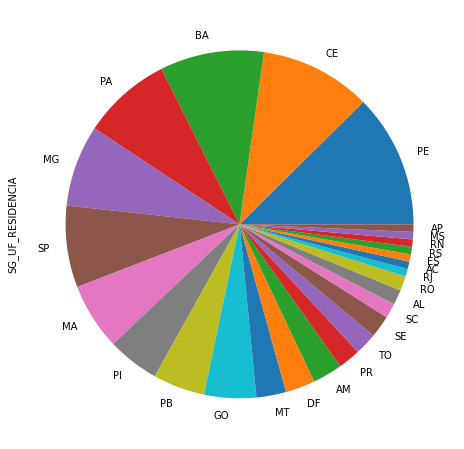

In [8]:
# Fazendo gráfico de pizza
# Não é fácil fazer comparações neles (ex: CE, BA e PA parecem iguais)
alunos_menor_quartoze = dados.query("NU_IDADE <= 14")
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8))

**OBS: hashable types in python**

All built-in immutable types are hashable, but mutable ones are not. Common hashable types include all numbers, strings (both unicode and bytes ) and tuple . Common unhashable types include list , dict and set . In order to store a key in a dict or set a hash value is needed. More on that [here](https://www.pythonforthelab.com/blog/what-are-hashable-objects/).


<AxesSubplot:>

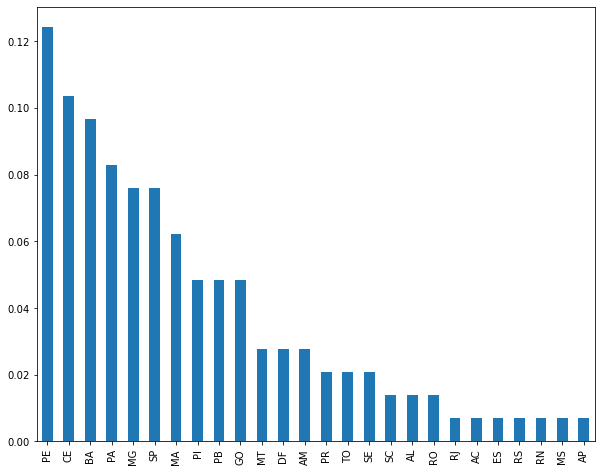

In [9]:
#Plotando um gráfico de barras para as porcentagens de alunos com 14 anos ou menos
#Mais legível e fácil de comparar
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(10,8))

In [10]:
#Amostra dos alunos menor que quatorze é pequena
#Difícil analizar e tirar conclusões com tão poucos alunos
len(alunos_menor_quartoze)

145

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

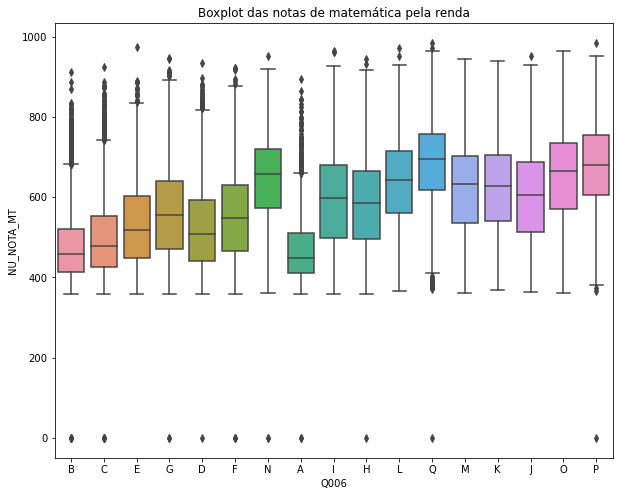

In [11]:
#Q006 - Questão sobre a renda mensal da família
#Repare que o eixo x não está ordenado
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados)
plt.title("Boxplot das notas de matemática pela renda")

In [12]:
#Ordenando os dados da questão 6
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

In [13]:
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

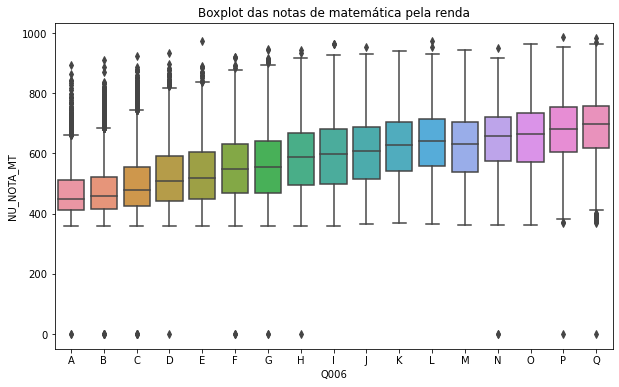

In [14]:
#Plotando com o eixo x ordenado
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")
#Outliers: os whiskers vão chegando cada vez mais próximos do teto.
#Logo, o número de outliers acima dos whiskers diminui
#E o numero de outliers abaixo aumenta

In [15]:
#Obtendo a nota total (soma de todas as notas)
dados[provas].sum()
#Usou o eixo 0 (coluna)

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

## Gerando nova coluna com a soma das notas por aluno

In [16]:
#Usando o eixo 1 (linhas) para obter a soma de cada aluno
#Inserindo uma nova coluna ("NU_NOTA_TOTAL") no dataframe
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

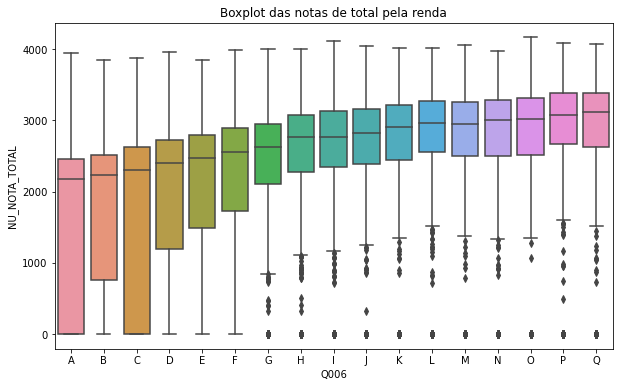

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")
#Muitas pessoas tiraram 0 em tudo, por vários motivos. Daí o 0 fica no limite do primeiro quartil
#Inverso do outro gráfico. Nesse caso, os outliers não aparecem no começo pq tem mta gente no limite mínimo

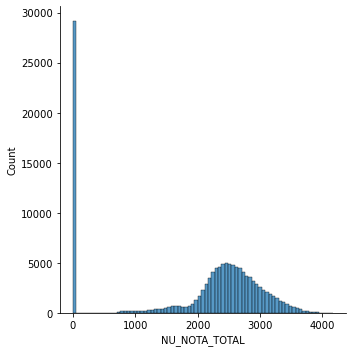

In [18]:
#Plotando histograma da nota total pra tentar entender isso melhor
sns.displot(dados, x ="NU_NOTA_TOTAL")
#0 é a nota mais frequente (moda)
#Tem um volume mto grande de pessoas que tiraram 0, mas ao analisar em conjunto com o nosso gráfico
#essas notas são mais comuns entre as pessoas com menor renda familiar da nossa amostra

In [28]:
# O que levou tantas pessoas a tirar nota 0?
# Vamos olhar só para essas pessoas

provas.append("NU_NOTA_TOTAL") # Adicionando a coluna da nota total à lista de colunas de notas
dados[provas].query("NU_NOTA_TOTAL == 0") #Pegando apenas as notas dos alunos que zeraram
#Podemos ver que vários valores apresentam NaN (not a number), aparentemente usado quando que é quando a pessoa não foi fazer a prova
#Logo, pode ser que as pessoas que tiraram 0 não puderam se locomover para o local da prova, cegaram atrasados, etc.
#E isso aparentemente está correlacionado com a renda familiar
#Múltiplas hipóteses: 
## Pessoa precisa trabalhar, não tinha dinheiro pro transporte, perdeu o onibus, que em fds é menos regular, etc...
#ENEM e outras provas: viés para as pessoas mais ricas. Tanto por causa do transporte privado quanto outros motivos...

#E se não fosse prova presencial? Será que ainda teria viés? Possivelmente sim

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,NU_NOTA_TOTAL,NU_NOTA_TOTAL,NU_NOTA_TOTAL,NU_NOTA_TOTAL,NU_NOTA_TOTAL,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Precisamos remover as notas 0 para conseguir de fato analisar o resto
#Usa nota total. Pessoa pode ter zerado alguma prova individual
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

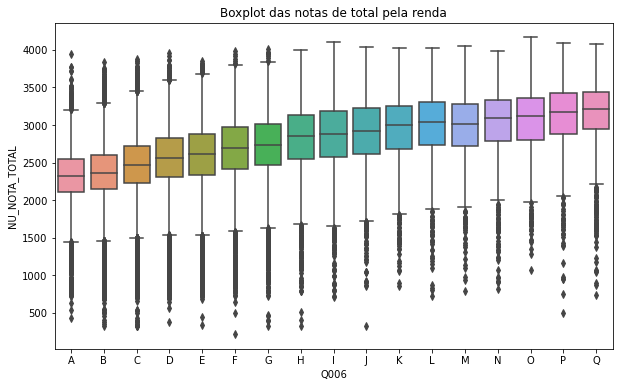

In [30]:
#Analisando após limpar os zeros do dataset
#O problema do viés persiste
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

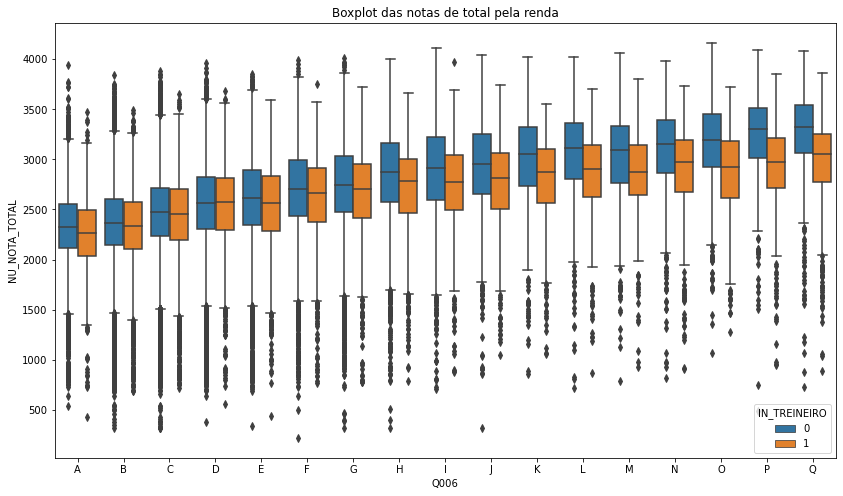

In [35]:
#E se quisermos linkar mais informação no boxplot? (e.g. renda E se a pessoa é treineiro)
#Com o parâmetro 'hue', dá pra adicionar outras informações e dividir melhor os resultados do gráfico
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")
#Rendas mais baixas: Treineiro e não treineiro não tem tanta diferença
#Hipótese: Quando a pessoa com dinheiro vai fazer, ela tem condições de se preparar melhor. Pagar cursinho e afins
#Ensino de qualidade obviamente impacta mto tbm, já que os treineiros mais ricos inclusive se saem melhor que os não treineiros mais pobres
#Obviamente, o número de treineiros e não treineiros é muito diferente também, então é sempre bom tomar cuidado com as afirmações

## MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

## Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

## Desafio 3: Criar uma função para plotar o boxplot do seaborn

## Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

## Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

## DEsafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

## Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.